In [1]:
from google.colab import drive
drive.mount('/content/drive')

from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from keras import utils
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten , Activation, SimpleRNN, LSTM, GRU, Dropout, TimeDistributed, Reshape, Input, Lambda, Add,BatchNormalization
from tensorflow.keras import Sequential
import numpy as np
data = pd.concat([pd.read_csv('/content/drive/MyDrive/UNSW_NB15/UNSW-NB15_1.csv', header=None), \
    pd.read_csv('/content/drive/MyDrive/UNSW_NB15/UNSW-NB15_2.csv', header=None), \
        pd.read_csv('/content/drive/MyDrive/UNSW_NB15/UNSW-NB15_3.csv', header=None), \
            pd.read_csv('/content/drive/MyDrive/UNSW_NB15/UNSW-NB15_4.csv', header=None)], ignore_index=True)
data = data.drop([48],axis=1)
data = data.drop([1],axis=1)
data = data.drop([3],axis=1)


Mounted at /content/drive


<ipython-input-1-312258b626a4>:15: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.concat([pd.read_csv('/content/drive/MyDrive/UNSW_NB15/UNSW-NB15_1.csv', header=None), \
<ipython-input-1-312258b626a4>:16: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/content/drive/MyDrive/UNSW_NB15/UNSW-NB15_2.csv', header=None), \


<ipython-input-2-36e161228a35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


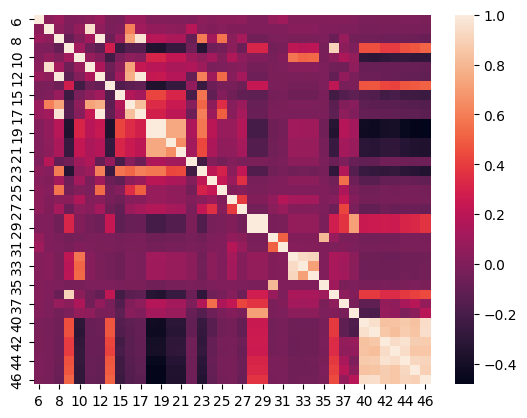

In [2]:
import seaborn as sns
sns.heatmap(data.corr())
from matplotlib import pyplot as plt
plt.show()

In [4]:


data[47] = data[47].fillna('Normal')
data[47] = data[47].replace(' Fuzzers','Fuzzers')
data[47] = data[47].replace(' Fuzzers ','Fuzzers')
data[47] = data[47].replace(' Reconnaissance','Reconnaissance')
data[47] = data[47].replace(' Reconnaissance ','Reconnaissance')
data[47] = data[47].replace(' Shellcode','Shellcode')
data[47] = data[47].replace(' Shellcode ','Shellcode')
data[47] = data[47].replace('Backdoors','Backdoor')
data = data.fillna(0)
data[39] = data[39].replace(' ',0)
data[39] = data[39].astype('int64')


data = data.fillna(0)

data=data.drop_duplicates()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[0]=le.fit_transform((data[0]))

data[2]=le.fit_transform((data[2]))


data[4]=le.fit_transform((data[4]))
data[5]=le.fit_transform((data[5]))
data[6]=le.fit_transform((data[6]))
data[13]=le.fit_transform((data[13]))
data[47]=le.fit_transform((data[47]))


Y=data[47]



data = data.drop([47],axis=1)


scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data))


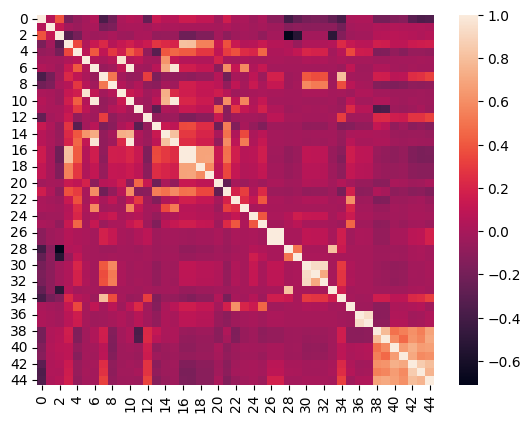

In [5]:
import seaborn as sns
sns.heatmap(data.corr())
from matplotlib import pyplot as plt
plt.show()

In [6]:

data = data.drop([7],axis=1)
data = data.drop([8],axis=1)
data = data.drop([34],axis=1)

#////

y=np.array(Y)

Y=pd.DataFrame(y)
#data['y']=Y
ub_train,ub_test,train_res,test_res=train_test_split(data , Y , test_size=0.3 , shuffle=True)

In [ ]:
ub_train.to_csv("/content/drive/MyDrive/UNSW_NB15_split/X_train.csv")
ub_test.to_csv("/content/drive/MyDrive/UNSW_NB15_split/X_test.csv")
train_res.to_csv("/content/drive/MyDrive/UNSW_NB15_split/y_train.csv")
test_res.to_csv("/content/drive/MyDrive/UNSW_NB15_split/y_test.csv")